In [19]:
import pandas as pd
import os
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime
from dateutil.relativedelta import relativedelta
import numpy as np; 
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
import portfolio_builder_calc_ranking as cr
import FMP_Requests as fmp

%matplotlib inline

pn.extension()

In [20]:
# Load the environment variables from the .env file
load_dotenv()
apikey = os.getenv("FMP_API_KEY")

In [38]:
# create widgets
text_box = pn.widgets.TextInput(name='Enter Year to find top 5 companies by Earnings Yield and Return on Tangible Assets:', value='')
text=pn.widgets.StaticText()

# create function
def get_year(event):
    text.value = f'{text_box.value}'
    display(text)
    return text
    
# create button widget
button = pn.widgets.Button(name='click', button_type='primary')

# button with on click
year = button.on_click(get_year)

# layout
pn.Column(text_box, button, text)

Column
    [0] TextInput(name='Enter Year to f...)
    [1] Button(button_type='primary', name='click')
    [2] StaticText()

In [39]:

print (year)

None


In [40]:
year = "2015"

In [41]:
# get ranking for given year by using portfolio_builder_calc_ranking module
df = cr.get_ranking(year)

In [48]:
# get top 5 companies from dataframe df
top5_df = df.head(n=5)
top5_tickers_list = list(top5_df.index)
print(f"Top 5 companies in {year}")
print (top5_tickers_list)

Top 5 companies in 2015
['GILD', 'MDLZ', 'UAL', 'DOV', 'LYB']


In [43]:
# get past stock prices of top 5 companies and store in stock_prices dictionary
start_date = year + "-01-15"
end_date = year + "-01-20"
past_stock_prices = {}
for ticker in top5_tickers_list:

    prices = fmp.get_stock_hist_daily_prices(ticker, start_date, end_date, apikey)
    price = prices['close'].iloc[-1]
    past_stock_prices[ticker] = price
    
past_stock_prices_df = pd.DataFrame.from_dict(past_stock_prices, orient="index")
past_stock_prices_df.columns = ['past_price']

In [44]:
# get current stock prices of top 5 companies and store in stock_prices dictionary
current_stock_prices = {}
for ticker in top5_tickers_list:
    
    prices = fmp.get_current_stock_price(ticker, apikey)
    price_df = pd.DataFrame(prices)
    price = price_df.iloc[0,1]
    current_stock_prices[ticker] = price 
    
current_stock_prices_df = pd.DataFrame.from_dict(current_stock_prices, orient="index")
current_stock_prices_df.columns = ['current_price']

In [45]:
price_change_df = pd.concat([current_stock_prices_df, past_stock_prices_df], axis=1)
price_change_df['price_change'] = current_stock_prices_df['current_price'] - past_stock_prices_df['past_price']
print("Past Price is based on Jan " + year)
print ("Current Price is last working day close price")
print()
print(price_change_df)


Past Price is based on Jan 2015
Current Price is last working day close price

      current_price  past_price  price_change
GILD          61.09   97.400002    -36.310001
MDLZ          63.77   36.540001     27.229999
UAL           37.82   63.830000    -26.010000
DOV          134.03   55.403877     78.626123
LYB           85.61   75.269997     10.340003


In [14]:
# Set top_5_by_rank asset held in the portfolio = 25 of $100k value.
GILD = 20000
MDLZ = 20000
UAL = 20000
DOV = 20000
LYB = 20000

In [15]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")




In [16]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [17]:
tickers = ["GILD", "MDLZ", "UAL", "DOV", "LYB"]

# Set timeframe to 1Day 
timeframe = "1Day"

start_date = pd.Timestamp("2015-01-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-05", tz="America/New_York").isoformat()


In [18]:
portfolio_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
portfolio_prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,65.70,66.880,65.6800,66.57,1804494,16001,66.273923,DOV
2015-12-02 05:00:00+00:00,66.39,66.560,64.8000,65.05,1472075,14106,65.336641,DOV
2015-12-03 05:00:00+00:00,65.14,66.080,64.5400,65.66,2774243,21524,65.404927,DOV
2015-12-04 05:00:00+00:00,64.77,65.820,64.0300,64.75,2644282,23634,64.985032,DOV
2015-12-07 05:00:00+00:00,64.04,64.520,63.2100,64.22,1968344,17306,64.087506,DOV
...,...,...,...,...,...,...,...,...
2022-08-01 04:00:00+00:00,36.69,37.945,36.3600,37.69,9461865,80213,37.366544,UAL
2022-08-02 04:00:00+00:00,37.21,38.115,36.7600,37.23,8624860,75671,37.466453,UAL
2022-08-03 04:00:00+00:00,37.70,38.720,37.5001,38.63,10166164,78837,38.338422,UAL


In [10]:

# Reorganize the DataFrame
# # Separate ticker data
GILD = portfolio_prices_df[portfolio_prices_df['symbol']=='GILD'].drop('symbol', axis=1)
MDLZ = portfolio_prices_df[portfolio_prices_df['symbol']=='MDLZ'].drop('symbol', axis=1)
UAL = portfolio_prices_df[portfolio_prices_df['symbol']=='MDLZ'].drop('symbol', axis=1)
DOV = portfolio_prices_df[portfolio_prices_df['symbol']=='MDLZ'].drop('symbol', axis=1)
LYB = portfolio_prices_df[portfolio_prices_df['symbol']=='MDLZ'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
portfolio_prices_df = pd.concat([GILD, MDLZ, UAL, DOV, LYB], axis=1, keys=["GILD", "MDLZ", "UAL", "DOV", "LYB"])

# Review the first 5 rows of the Alpaca DataFrame
portfolio_prices_df.head()

GILD                                    \
                             open    high     low   close    volume   
timestamp                                                             
2015-12-01 05:00:00+00:00  106.38  107.38  104.65  105.85  10659529   
2015-12-02 05:00:00+00:00  105.00  105.57  104.30  104.44   8850461   
2015-12-03 05:00:00+00:00  104.46  104.59  100.50  101.38  13772369   
2015-12-04 05:00:00+00:00  101.44  104.16  101.25  104.07   8738290   
2015-12-07 05:00:00+00:00  103.88  104.15  102.25  102.91   5956098   

                                                    MDLZ                 ...  \
                          trade_count        vwap   open   high     low  ...   
timestamp                                                                ...   
2015-12-01 05:00:00+00:00       74517  105.792679  44.08  44.54  43.760  ...   
2015-12-02 05:00:00+00:00       62061  104.844584  44.34  44.35  43.755  ...   
2015-12-03 05:00:00+00:00       94800  101.854144  43.91  44.13  42.410  ...   
2015-12-04 05:00:00+00:00       66289  103.175540  42.83  44.54  42.820  ...   
2015-12-07 05:00:00+00:00       51432  102.970408  44.43  44.50  43.730  ...   

                                DOV                           LYB         \
                             volume trade_count       vwap   open   high   
timestamp                                                                  
2015-12-01 05:00:00+00:00  10622120       42414  44.271969  44.08  44.54   
2015-12-02 05:00:00+00:00   5420187       35969  43.996338  44.34  44.35   
2015-12-03 05:00:00+00:00  13964938       71262  42.875923  43.91  44.13   
2015-12-04 05:00:00+00:00  11277953       62317  44.192215  42.83  44.54   
2015-12-07 05:00:00+00:00   9224570       41096  44.036438  44.43  44.50   

                                                                           
                              low  close    volume trade_count       vwap  
timestamp                                                                  
2015-12-01 05:00:00+00:00  43.760  44.32  10622120       42414  44.271969  
2015-12-02 05:00:00+00:00  43.755  43.86   5420187       35969  43.996338  
2015-12-03 05:00:00+00:00  42.410  42.61  13964938       71262  42.875923  
2015-12-04 05:00:00+00:00  42.820  44.50  11277953       62317  44.192215  
2015-12-07 05:00:00+00:00  43.730  44.03   9224570       41096  44.036438  

[5 rows x 35 columns]

In [17]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split equal weighted.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data = portfolio_prices_df,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# Review the simulation input data
MC_thirty_year.portfolio_data.head()


GILD                                    \
                             open    high     low   close    volume   
timestamp                                                             
2015-12-01 05:00:00+00:00  106.38  107.38  104.65  105.85  10659529   
2015-12-02 05:00:00+00:00  105.00  105.57  104.30  104.44   8850461   
2015-12-03 05:00:00+00:00  104.46  104.59  100.50  101.38  13772369   
2015-12-04 05:00:00+00:00  101.44  104.16  101.25  104.07   8738290   
2015-12-07 05:00:00+00:00  103.88  104.15  102.25  102.91   5956098   

                                                                 MDLZ         \
                          trade_count        vwap daily_return   open   high   
timestamp                                                                      
2015-12-01 05:00:00+00:00       74517  105.792679          NaN  44.08  44.54   
2015-12-02 05:00:00+00:00       62061  104.844584    -0.013321  44.34  44.35   
2015-12-03 05:00:00+00:00       94800  101.854144    -0.029299  43.91  44.13   
2015-12-04 05:00:00+00:00       66289  103.175540     0.026534  42.83  44.54   
2015-12-07 05:00:00+00:00       51432  102.970408    -0.011146  44.43  44.50   

                           ...        DOV                 LYB                 \
                           ...       vwap daily_return   open   high     low   
timestamp                  ...                                                 
2015-12-01 05:00:00+00:00  ...  44.271969          NaN  44.08  44.54  43.760   
2015-12-02 05:00:00+00:00  ...  43.996338    -0.010379  44.34  44.35  43.755   
2015-12-03 05:00:00+00:00  ...  42.875923    -0.028500  43.91  44.13  42.410   
2015-12-04 05:00:00+00:00  ...  44.192215     0.044356  42.83  44.54  42.820   
2015-12-07 05:00:00+00:00  ...  44.036438    -0.010562  44.43  44.50  43.730   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2015-12-01 05:00:00+00:00  44.32  10622120       42414  44.271969          NaN  
2015-12-02 05:00:00+00:00  43.86   5420187       35969  43.996338    -0.010379  
2015-12-03 05:00:00+00:00  42.61  13964938       71262  42.875923    -0.028500  
2015-12-04 05:00:00+00:00  44.50  11277953       62317  44.192215     0.044356  
2015-12-07 05:00:00+00:00  44.03   9224570       41096  44.036438    -0.010562  

[5 rows x 40 columns]

In [18]:
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jchow/Desktop/fintech_workspace/week_eight/Group_2_Stocks_Pickers/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009041,1.001812,1.006030,1.003033,1.005838,0.990437,1.013103,0.993652,1.007950,0.998713,...,1.003695,0.995679,0.994906,1.004736,1.006741,0.994876,1.012143,0.994619,0.997300,1.010743
2,1.018371,1.009075,1.003884,1.014733,1.012655,0.990702,1.020007,1.001290,1.014830,1.008145,...,0.999240,0.997674,0.990185,1.013522,1.005195,0.991357,1.017348,1.001906,0.995055,1.012937
3,1.022628,1.010911,0.999303,1.007339,1.013369,0.993867,1.022829,0.999056,1.015028,1.002406,...,0.998399,0.995851,0.990689,1.010540,1.012302,1.001694,1.023437,1.003538,1.000738,1.008676
4,1.035498,1.014916,0.995807,1.009836,1.007323,0.999442,1.019988,0.992048,1.022557,0.997584,...,0.995985,1.003963,0.993032,1.007716,1.014774,0.991517,1.028837,1.013163,1.003771,1.018351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.029453,4.189329,5.477210,4.367424,4.006220,6.044678,7.740205,7.511137,5.039220,4.025653,...,4.636035,4.172239,2.660983,4.476087,4.880248,5.642128,6.556938,3.256187,5.258095,6.675471
7557,5.051223,4.243023,5.496214,4.388732,3.998571,6.035436,7.710125,7.494431,4.997946,4.069434,...,4.623994,4.182210,2.649378,4.488136,4.898812,5.662315,6.606483,3.256564,5.271519,6.693738
7558,5.059180,4.309997,5.523081,4.343500,3.996579,6.113780,7.769272,7.472277,4.969120,4.077058,...,4.629226,4.153595,2.651516,4.498470,4.933469,5.619614,6.633047,3.201885,5.196926,6.688976
7559,5.100222,4.291650,5.554095,4.349989,3.956609,6.108439,7.745263,7.505173,4.988146,4.104266,...,4.588316,4.193471,2.685159,4.493245,4.886112,5.654207,6.599058,3.190667,5.169537,6.671959


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

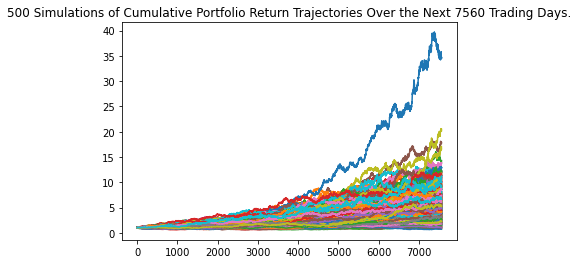

In [19]:
MC_thirty_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

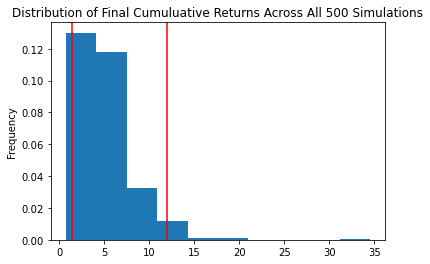

In [20]:
MC_thirty_year.plot_distribution()

In [21]:
MC_thirty_summary_statistics = MC_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_thirty_summary_statistics)

count           500.000000
mean              5.117383
std               3.137742
min               0.721935
25%               3.059133
50%               4.430544
75%               6.522568
max              34.541023
95% CI Lower      1.425567
95% CI Upper     11.999459
Name: 7560, dtype: float64


In [24]:
pwd

'/Users/jchow/Desktop/fintech_workspace/week_eight/Group_2_Stocks_Pickers'